Reading fixed image DICOM series...
Reading moving image DICOM series...
Displaying the Fixed (reference) image middle slice...
Displaying slice 89 of 178


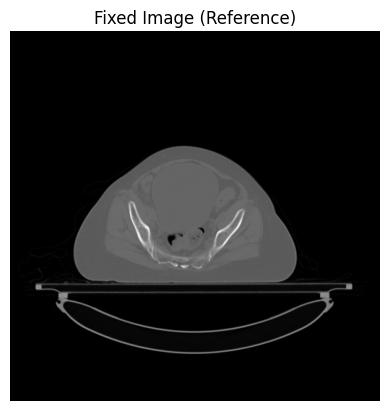

Displaying the Moving image middle slice...
Displaying slice 57 of 115


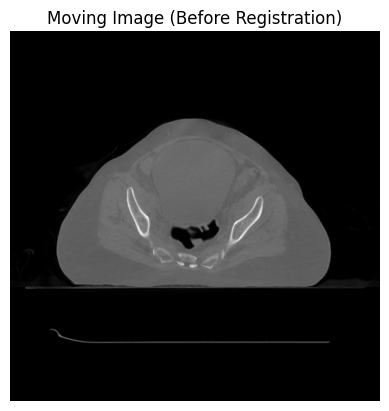

In [68]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt

def read_dicom_series(dicom_directory):
    """
    Read a DICOM series from the specified directory and return
    the SimpleITK image object.
    """
    reader = sitk.ImageSeriesReader()
    series_ids = reader.GetGDCMSeriesIDs(dicom_directory)

    if not series_ids:
        raise ValueError(f"No DICOM series found in directory: {dicom_directory}")

    # Select the first series (if multiple are found)
    series_id = series_ids[0]
    dicom_filenames = reader.GetGDCMSeriesFileNames(dicom_directory, series_id)
    reader.SetFileNames(dicom_filenames)

    image = reader.Execute()
    return image

def register_volumes(fixed_image, moving_image):
    """
    Perform registration of a moving image to a fixed image using
    SimpleElastix (ITK-Elastix) and return the registered image.
    """
    elastix_image_filter = sitk.ElastixImageFilter()
    elastix_image_filter.SetFixedImage(fixed_image)
    elastix_image_filter.SetMovingImage(moving_image)

    # Define parameter maps
    rigid_param_map = sitk.GetDefaultParameterMap("rigid")

    # Optional: Adjust default parameters here, for example:
    # rigid_param_map["MaximumNumberOfIterations"] = ["512"]
    # bspline_param_map["MaximumNumberOfIterations"] = ["512"]

    # Add parameter maps in sequence (rigid, then bspline)
    elastix_image_filter.SetParameterMap(rigid_param_map)

    # Execute the registration
    elastix_image_filter.Execute()

    # Return the resulting registered image
    return elastix_image_filter.GetResultImage()

def display_middle_slice(image, title=""):
    """
    Display the middle slice of a 3D SimpleITK image using matplotlib.
    """
    # Convert SimpleITK image to a NumPy array (z, y, x)
    array = sitk.GetArrayFromImage(image)
    middle_slice_index = array.shape[0] // 2  # pick the central slice
    print(f"Displaying slice {middle_slice_index} of {array.shape[0]}")
    plt.imshow(array[middle_slice_index, :, :], cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    # Paths to your DICOM directories
    fixed_dicom_directory = "../data/hf/CT"
    moving_dicom_directory = "../data/hf/CBCT"

    # 1. Read the DICOM volumes
    print("Reading fixed image DICOM series...")
    fixed_image = read_dicom_series(fixed_dicom_directory)

    print("Reading moving image DICOM series...")
    moving_image = read_dicom_series(moving_dicom_directory)

    # 2. Display middle slice of the input images
    print("Displaying the Fixed (reference) image middle slice...")
    display_middle_slice(fixed_image, title="Fixed Image (Reference)")

    print("Displaying the Moving image middle slice...")
    display_middle_slice(moving_image, title="Moving Image (Before Registration)")

Reading fixed image DICOM series...
Reading moving image DICOM series...
Displaying the Fixed (reference) image middle slice...
Displaying slice 89 of 178
Image size: (178, 512, 512)


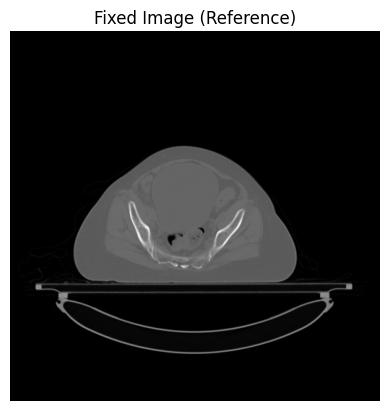

Displaying the Moving image middle slice...
Displaying slice 57 of 115
Image size: (115, 512, 512)


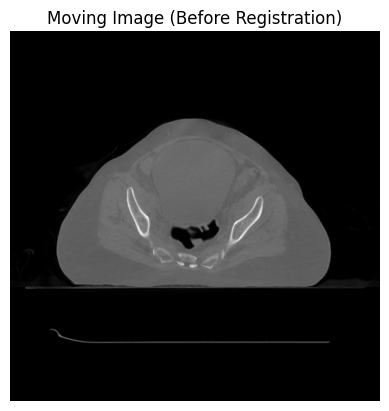

Performing registration...
Installing all components.
InstallingComponents was successful.

ELASTIX version: 5.0.1
Command line options from ElastixBase:
-fMask    unspecified, so no fixed mask used
-mMask    unspecified, so no moving mask used
-out      ./
-threads  unspecified, so all available threads are used
  The default value "true" is used instead.

  From elastix 4.8 it defaults to true!
This may change the behavior of your registrations considerably.

Command line options from TransformBase:
-t0       unspecified, so no initial transform used

Reading images...
Reading images took 0 ms.

  A default pyramid schedule is used.
  A default pyramid schedule is used.
  The default value "false" is used instead.
  The default value "GeometricalCenter" is used instead.
Transform parameters are initialized as: [0, 0, 0, 0, 0, 0]
Scales are estimated automatically.
Scales for transform parameters are: [43311.831604003906, 43311.831604003906, 63501.66320800781, 1, 1, 1]
Initialization 

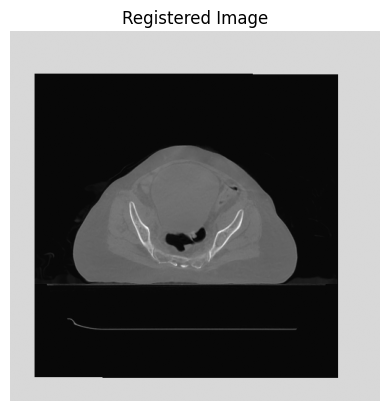

In [2]:
if __name__ == "__main__":
    # Paths to your DICOM directories
    fixed_dicom_directory = "../data/hf/CT"
    moving_dicom_directory = "../data/hf/CBCT"

    # 1. Read the DICOM volumes
    print("Reading fixed image DICOM series...")
    fixed_image = read_dicom_series(fixed_dicom_directory)

    print("Reading moving image DICOM series...")
    moving_image = read_dicom_series(moving_dicom_directory)

    # 2. Display middle slice of the input images
    print("Displaying the Fixed (reference) image middle slice...")
    display_middle_slice(fixed_image, title="Fixed Image (Reference)")

    print("Displaying the Moving image middle slice...")
    display_middle_slice(moving_image, title="Moving Image (Before Registration)")

    # 3. Perform registration
    print("Performing registration...")
    registered_image = register_volumes(fixed_image, moving_image)

    # Display the registered result
    print("Displaying the Registered (result) image middle slice...")
    display_middle_slice(registered_image, title="Registered Image")

Displaying the Moving image middle slice...
Displaying slice 89 of 178


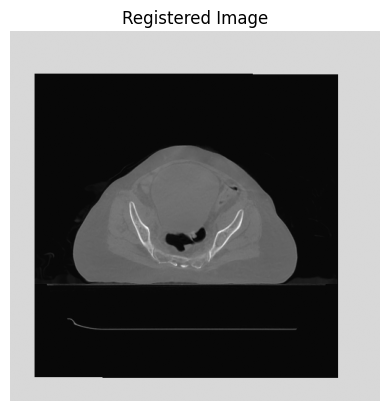

In [4]:
def display_middle_slice(image, title=""):
    """
    Display the middle slice of a 3D SimpleITK image using matplotlib.
    """
    # Convert SimpleITK image to a NumPy array (z, y, x)
    array = sitk.GetArrayFromImage(image)
    middle_slice_index = array.shape[0] // 2
    print(f"Displaying slice {middle_slice_index} of {array.shape[0]}")
    plt.imshow(array[middle_slice_index, :, :], cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    print("Displaying the Moving image middle slice...")
    display_middle_slice(registered_image, title="Registered Image")

## Slide show

In [8]:
import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def read_dicom_series(dicom_directory):
    """
    Read a DICOM series from the specified directory and return a SimpleITK image.
    """
    reader = sitk.ImageSeriesReader()
    series_ids = reader.GetGDCMSeriesIDs(dicom_directory)
    if not series_ids:
        raise ValueError(f"No DICOM series found in {dicom_directory}")
    series_id = series_ids[0]
    dicom_filenames = reader.GetGDCMSeriesFileNames(dicom_directory, series_id)
    reader.SetFileNames(dicom_filenames)
    return reader.Execute()

def estimate_background_intensity(image, margin=10, strategy="corners"):
    """
    Estimate a 'background' intensity from a 3D SimpleITK image by sampling
    a region likely outside the body (e.g., corners). This is just a heuristic!

    Parameters:
    -----------
    - image: SimpleITK image
    - margin: number of pixels to sample from the border
    - strategy: one of ["corners", "min", "mean"]

    Returns:
    --------
    - A float representing the estimated background intensity.
    """
    arr = sitk.GetArrayFromImage(image)  # shape [z, y, x]

    if strategy == "min":
        # Simply take the minimum intensity in the whole volume
        return float(arr.min())

    elif strategy == "mean":
        # Take the mean intensity of the entire volume
        return float(arr.mean())

    elif strategy == "corners":
        # Sample intensities from the corners of the volume
        z_size, y_size, x_size = arr.shape
        # top slice corners
        corner_vals = arr[0, :margin, :margin].flatten().tolist()
        corner_vals += arr[0, -margin:, -margin:].flatten().tolist()
        corner_vals += arr[0, :margin, -margin:].flatten().tolist()
        corner_vals += arr[0, -margin:, :margin].flatten().tolist()

        # bottom slice corners
        corner_vals += arr[-1, :margin, :margin].flatten().tolist()
        corner_vals += arr[-1, -margin:, -margin:].flatten().tolist()
        corner_vals += arr[-1, :margin, -margin:].flatten().tolist()
        corner_vals += arr[-1, -margin:, :margin].flatten().tolist()

        # Just take the mean of these corner values
        if corner_vals:
            return float(np.mean(corner_vals))
        else:
            return float(arr.min())  # fallback

    else:
        raise ValueError(f"Unknown strategy: {strategy}")

def register_volumes(fixed_image, moving_image,
                     strategy="corners", margin=10):
    """
    Register the moving image to the fixed image using SimpleElastix.
    Dynamically set the DefaultPixelValue based on the background intensity
    in the moving image (so that out-of-bounds areas match the 'air' or
    outside region).

    Parameters
    ----------
    - fixed_image:  SimpleITK image (fixed/reference)
    - moving_image: SimpleITK image (moving)
    - strategy:     method to estimate background. One of ["corners","min","mean"]
    - margin:       integer margin for sampling if using "corners"
    """
    # Estimate background from the moving image
    bg_value = estimate_background_intensity(moving_image, margin, strategy)
    print(f"Estimated background = {bg_value:.2f} (using '{strategy}' strategy)")

    # Prepare registration
    elastix_image_filter = sitk.ElastixImageFilter()
    elastix_image_filter.SetFixedImage(fixed_image)
    elastix_image_filter.SetMovingImage(moving_image)
    elastix_image_filter.LogToConsoleOff()
    elastix_image_filter.LogToFileOff()

    # Rigid registration as an example
    rigid_param_map = sitk.GetDefaultParameterMap("rigid")

    # Assign the dynamic background value
    # NOTE: must be a string inside a list for Elastix
    rigid_param_map["DefaultPixelValue"] = [str(int(round(bg_value)))]

    # Configure parameter map
    elastix_image_filter.SetParameterMap(rigid_param_map)

    # Do the registration
    elastix_image_filter.Execute()
    return elastix_image_filter.GetResultImage()

def show_interactive_slices(fixed_image, moving_image, registered_image):
    """
    Display a slider in a Jupyter notebook that allows you
    to scroll through slices of the fixed, moving, and registered
    images side by side.
    """
    fixed_array = sitk.GetArrayFromImage(fixed_image)
    moving_array = sitk.GetArrayFromImage(moving_image)
    reg_array    = sitk.GetArrayFromImage(registered_image)
    max_z = min(fixed_array.shape[0], moving_array.shape[0], reg_array.shape[0]) - 1
    slice_slider = widgets.IntSlider(value=max_z // 2, min=0, max=max_z, step=1, description='Slice')

    def view_slice(slice_index):
        plt.close('all')
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        axes[0].imshow(fixed_array[slice_index, :, :], cmap='gray')
        axes[0].set_title('Fixed Image')
        axes[0].axis('off')

        axes[1].imshow(moving_array[slice_index, :, :], cmap='gray')
        axes[1].set_title('Moving Image')
        axes[1].axis('off')

        axes[2].imshow(reg_array[slice_index, :, :], cmap='gray')
        axes[2].set_title('Registered Image')
        axes[2].axis('off')

        plt.show()

    widgets.interact(view_slice, slice_index=slice_slider)

if __name__ == "__main__":
    # Example usage
    fixed_dicom_directory = "../data/hf_crop/CT"
    moving_dicom_directory = "../data/hf_crop/CBCT"

    fixed_image  = read_dicom_series(fixed_dicom_directory)
    moving_image = read_dicom_series(moving_dicom_directory)

    # Register with dynamic background guessing via corners
    registered_image = register_volumes(fixed_image, moving_image,
                                        strategy="corners", margin=10)

    # Show slider in Jupyter
    show_interactive_slices(fixed_image, moving_image, registered_image)

Estimated background = -1000.00 (using 'corners' strategy)


interactive(children=(IntSlider(value=57, description='Slice', max=114), Output()), _dom_classes=('widget-inte…

In [100]:
import os
import SimpleITK as sitk
import uuid

import numpy as np  # Add this import at the top

def save_dicom_series_with_geometry(image, output_dir):
    """Saves 3D 'image' as a DICOM series with correct geometry & new UIDs."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Cast to Int16 for DICOM compatibility
    image = sitk.Cast(image, sitk.sitkInt16)
    
    size = image.GetSize()       # (x, y, z)
    spacing = image.GetSpacing() # (sx, sy, sz)
    origin = image.GetOrigin()   # (ox, oy, oz)
    direction = image.GetDirection()  # 9-element direction matrix

    # Generate filenames for each slice
    file_names = [os.path.join(output_dir, f"{i:03d}.dcm") for i in range(size[2])]
    
    # Create new Series Instance UID for the entire series
    new_series_uid = f"1.2.826.0.1.3680043.2.1125.{uuid.uuid4().int}"

    # Extract row (x) and column (y) direction vectors
    dir_x = np.array(direction[0:3])
    dir_y = np.array(direction[3:6])
    
    # Compute slice normal (cross product of row and column directions)
    slice_normal = np.cross(dir_x, dir_y)
    slice_normal /= np.linalg.norm(slice_normal)  # Normalize

    # Image Orientation (Patient) for axial slices
    iop = f"{dir_x[0]:.6f}\\{dir_x[1]:.6f}\\{dir_x[2]:.6f}\\{dir_y[0]:.6f}\\{dir_y[1]:.6f}\\{dir_y[2]:.6f}"

    # Loop through each slice to set metadata and write
    for z in range(size[2]):
        # Extract 2D slice (z-axis is third dimension in SimpleITK)
        slice_image = image[:, :, z]
        
        # Compute Image Position (Patient) using slice normal
        ipp_offset = z * spacing[2] * slice_normal
        ipp = np.array(origin) + ipp_offset
        ipp_str = f"{ipp[0]:.6f}\\{ipp[1]:.6f}\\{ipp[2]:.6f}"

        # Create metadata dictionary
        meta_dict = {
            "0008|0008": "ORIGINAL\\PRIMARY\\AXIAL",
            "0008|0060": "CT",
            "0010|0010": "Test^Patient",
            "0020|000e": new_series_uid,  # Series Instance UID
            "0008|0018": f"1.2.826.0.1.3680043.2.1125.{uuid.uuid4().int}",  # SOP Instance UID
            "0020|0013": str(z + 1),  # Instance Number
            "0028|0030": f"{spacing[1]:.6f}\\{spacing[0]:.6f}",  # Pixel spacing (y, x)
            "0018|0050": f"{spacing[2]:.3f}",  # Slice Thickness
            "0020|0032": ipp_str,  # Image Position (Patient)
            "0020|0037": iop,  # Image Orientation (Patient)
            # Pixel format metadata
            "0028|0100": "16",  # Bits Allocated
            "0028|0101": "16",  # Bits Stored
            "0028|0102": "15",  # High Bit
            "0028|0103": "1",   # Pixel Representation (1=signed)
        }

        # Attach metadata to the slice
        for key, value in meta_dict.items():
            slice_image.SetMetaData(key, value)
        
        # Write the slice
        writer = sitk.ImageFileWriter()
        writer.SetFileName(file_names[z])
        writer.SetImageIO("GDCMImageIO")
        writer.Execute(slice_image)

    print(f"Saved DICOM series to: {output_dir}")

In [101]:
if __name__ == "__main__":
    # 1. Read the DICOM volumes as before
    fixed_dicom_directory = "../data/hf/CT"
    moving_dicom_directory = "../data/hf/CBCT"

    fixed_image  = read_dicom_series(fixed_dicom_directory)
    moving_image = read_dicom_series(moving_dicom_directory)

    # 2. Perform registration (with dynamic background, etc.)
    registered_image = register_volumes(fixed_image, moving_image,
                                        strategy="corners", margin=10)

    # 3. Write the registered result as a new DICOM series
    show_interactive_slices(fixed_image, moving_image, registered_image)
    
    output_dicom_folder = "../data/regis/sCT"
    save_dicom_series_with_geometry(registered_image, output_dicom_folder)

Estimated background = -2000.00 (using 'corners' strategy)


interactive(children=(IntSlider(value=57, description='Slice', max=114), Output()), _dom_classes=('widget-inte…

Saved DICOM series to: ../data/regis/sCT


In [ ]:
def display_middle_slice(image, title=""):
    """
    Display the middle slice of a 3D SimpleITK image using matplotlib.
    """
    # Convert SimpleITK image to a NumPy array (z, y, x)
    array = sitk.GetArrayFromImage(image)
    middle_slice_index = array.shape[0] // 2
    print(f"Displaying slice {middle_slice_index} of {array.shape[0]}")
    plt.imshow(array[middle_slice_index, :, :], cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    print("Displaying the Moving image middle slice...")
    display_middle_slice(registered_image, title="Registered Image")

Successfully created 3D volume with size: (512, 512, 178)
Displaying slice 89 of 178


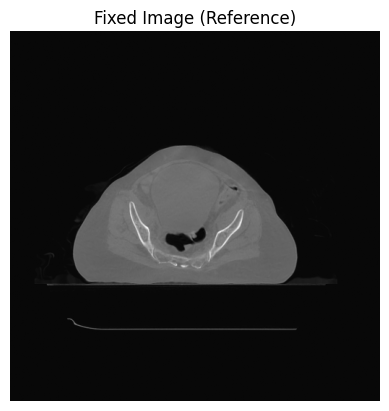

In [115]:
def read_and_stack_dicom_files(dicom_directory):
    """
    Read individual DICOM files and manually stack them into a 3D volume.
    """
    dicom_files = [os.path.join(dicom_directory, f) for f in os.listdir(dicom_directory) 
                   if f.endswith('.dcm') or f.endswith('.DCM')]
    
    if not dicom_files:
        raise ValueError(f"No DICOM files found in {dicom_directory}")
    
    # Sort files numerically by filename (assuming filenames like 001.dcm, 002.dcm, etc.)
    dicom_files.sort()
    
    # Read the first slice to get dimensions
    reader = sitk.ImageFileReader()
    reader.SetFileName(dicom_files[0])
    first_slice = reader.Execute()
    
    
    # Read all slices
    slices = []
    for file in dicom_files:
        reader.SetFileName(file)
        slice_img = reader.Execute()
        slice_array = sitk.GetArrayFromImage(slice_img)[0]  # Remove singleton dimension
        slices.append(slice_array)
    
    # Stack into a 3D volume
    volume = np.stack(slices, axis=0)
    
    # Convert back to SimpleITK image
    result_image = sitk.GetImageFromArray(volume)
    
    print(f"Successfully created 3D volume with size: {result_image.GetSize()}")
    
    return result_image


if __name__ == "__main__":
    fixed_image = read_and_stack_dicom_files("../data/regis/sCT")
    display_middle_slice(fixed_image, title="Fixed Image (Reference)")